 # Applying PCA to flowers 🌷
 
The *\"Iris dataset\"* is a collection of measurements popularised by statistician [Ronald Fisher](https://en.wikipedia.org/wiki/Ronald_Fisher) in 1936. It contains measurements on the length and width of the petals and sepals of 150 flowers of 3 different species in the *Iris* genus (50 each).

We are going to apply PCA to this dataset to **reduce** the dimensionality of the matrix from 4 to 2.

![3 different type of Iris flowers](graphs/iris_flowers.png)

## How PCA works, briefly explain 

PCA finds the *principal component*, which are the **underlying structure** in the data. They are the directions where there is the most variance, the directions where the data is most spread out.

PCA finds those variables ranked according to the variance of data along them, it means that more important principal components occurs first. **(more important = more variance/more spread out data)**

### Steps

- Get data and **center** it 

- Calculate the **covariance matrix** X of data points.
  
- Calculate **eigenvectors**, **eigenvalues** and **sort** them in descending order.
    
- **Choose first** k eigenvectors and **project** the new components.

- Calculate the **reconstruction error**
  

#### Get data and center it
It is important to center the data in PCA, ensures that each variable has zero mean, removing the bias from the means and allowing the covariance matrix to reflect only the relationships between the variables.
>In *each element* we **substract** from it the *mean of the column*, where $μj$ is the mean of the column
>
>$Xij′=X ij−μj$

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# load the CSV data into a pandas DataFrame
data = pd.read_csv("iris-annotated.csv")

# create a matrix using all columns except the last one (column 'Species')
# the `[:-1r]` to prevent it being converted to a Sage type number
clean_data = matrix(data.iloc[:, :-1r].values)
species = list(set(data["Species"]))  

# calculate the mean of each column in the clean data
means = vector([clean_data.column(i).mean() for i in range(clean_data.ncols())])

# create an auxiliar matrix where each row contains the mean of the columns
# this matrix will be used to center the data (i.e., subtract the mean from each feature)
means_matrix = matrix([means] * clean_data.nrows())

# center the data by subtracting the means from the original data
centered_data = clean_data - means_matrix
# print(centered_data)

#### Calculate the covariance matrix

The covariance matrix ($C$) is essential in PCA as it captures the relationships between the dataset's features. It is calculated by multiplying the centered data matrix ($X$) by its transpose and normalizing by ${1\over n−1}$ to obtain an unbiased estimate.
> $C=$ ${1\over n−1}X^TX$

The covariance matrix reveals the *variance* of each feature (on the diagonal) and the relationships between features (off-diagonal). PCA uses this matrix to identify the *principal components*, which are the directions of **maximum variance** in the data.


In [43]:
covariance_matrix = (1 / (centered_data.nrows() - 1)) * centered_data.transpose() * centered_data
print(covariance_matrix) 

[  0.6856935123042511  -0.0392684563758389   1.2736823266219242   0.5169038031319912]
[ -0.0392684563758389  0.18800402684563797 -0.32171275167785235 -0.11798120805369149]
[  1.2736823266219242 -0.32171275167785235     3.11317941834452   1.2963874720357944]
[  0.5169038031319912  -0.1179812080536915   1.2963874720357944   0.5824143176733785]


#### Calculate eigenvectors, eigenvalues and sort them in descending order

- Why we *need* eigenvectors and eigenvalues?  

Eigenvectors **represent** the directions of maximum variance in the data. These directions are used to project the data into a *lower-dimensional* space. By sorting eigenvalues in descending order, we determine which directions explain the *most variance*.

- Why use eigenvectors_**right**()?

If $𝐶$ is the covariance matrix, an eigenvalue $𝜆$, which indicates the amount of variance, and its corresponding eigenvector $𝑣$, which is a non-zero vector representing a direction in the dataset, satisfy:
> $Cv=λv$

So we use the method *eigenvectors_right()*, because we want to find the vectors scaled (transformed) by multiplying the covariance matrix on the right, while staying on the same vector space.

*Note: using eigenvectors_right() in SageMath 10.4 already returns the values in a descending order*

In [44]:
# eigenvectors_right() returns a list where each entry is a tuple
eigen_data = covariance_matrix.eigenvectors_right()

eigenvalues = [eigen[0] for eigen in eigen_data] # taking first element of each tuple
eigenvectors = [eigen[1][0] for eigen in eigen_data] # taking second element of each tuple

print(f"Eigenvalues:{eigenvalues}")
print(f"Eigenvectors: {eigenvectors}")

Eigenvalues:[4.224840768320111, 0.24224357162751564, 0.07852390809415492, 0.023683027126002457]
Eigenvectors: [(0.36158967738144965, -0.0822688898922142, 0.8565721052905279, 0.3588439262482154), (-0.656539883285832, -0.7297123713264962, 0.17576740342865438, 0.0747064701350338), (-0.5809972798276172, 0.596418087938104, 0.07252407548696362, 0.5490609107266029), (0.31725454716853907, -0.32409435241796647, -0.47971898732993956, 0.751120560380823)]


##### Plotting graph eigenvalues

To know which components explain the most variance and how many are needed to capture a desired proportion of variance. We need to calculate the **variation explain** and **cumulative variation explain**.

- Dividing each eigenvalue by the total variance gives the proportion of the total variance explained by that principal component
  > $Proportion$ $of$ $Variance$ $Explained$ $by$ $PCi =$ $\displaystyle{Eigenvalue_i\over{∑Eigenvalues}} $
  
- Cumulative variance helps us understand how much total variance is captured by the first 𝑘 components

Variance Explained:  [0.924616207174268, 0.053015567850535086, 0.01718513952500687, 0.005183085450190045]
Cumulative Variance Explained:  [0.924616207174268, 0.977631775024803, 0.9948169145498099, 1.0]


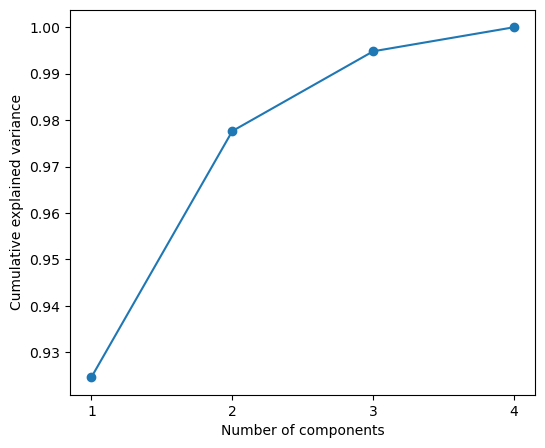

In [46]:
variation_explain = [v / sum(eigenvalues) for v in eigenvalues]  # individual variance explained
cumulative_var_exp = [sum(variation_explain[:i+1]) for i in range(len(variation_explain))]  # cumulative variance explained

# variance information
print('Variance Explained: ', variation_explain)
print('Cumulative Variance Explained: ', cumulative_var_exp)

# plotting graph
plt.figure(figsize=(6, 5))

plt.plot(range(1,centered_data.ncols()+1), cumulative_var_exp, '-o')
plt.xticks(range(1,centered_data.ncols()+1))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');
plt.show()

# display the plot
plt.show()

###### *Note: In the graph above, we can observe that the first principal component accounts for approximately 92% of the total variance. Including the second principal component increases the explained variance to about 97%, which is sufficient for most cases. In conclusion we can exclude the remaining components*

#### Choose first k eigenvectors and project the new components

In PCA, the goal of projecting the data onto the principal components is to:
- Reduce Dimensionality: By selecting the top *num_components*, we capture the most variance in the dataset while discarding lower-variance dimensions.
- Transform the Data: The data is represented in a new coordinate system defined by the principal components (the eigenvectors).

*Interpretation:* Each row in projected_data is the **representation** of the corresponding data point in the 2-dimensional space **spanned** by the top *num_components* principal components. This transformation preserves most of the variance in the data while reducing its complexity.


In [49]:
num_components = 2  # number of principal components to retain
# taking the first two eigenvectors, which they have the highest eigenvalue 
# transposition of the matrix to ensure proper aligment for matrix muliplication
principal_components = matrix(eigenvectors[:num_components]).transpose() 
#reducing dimensionality, i.e, matrix 150x4 to 150x2
projected_data = centered_data * principal_components
projected_data_list = list(projected_data)

print(f"Input matrix: {centered_data.nrows()}x{centered_data.ncols()}")
print(f"Ouput matrix: {projected_data.nrows()}x{projected_data.ncols()}")

Input matrix: 150x4
Ouput matrix: 150x2


##### Plotting matrix transformed


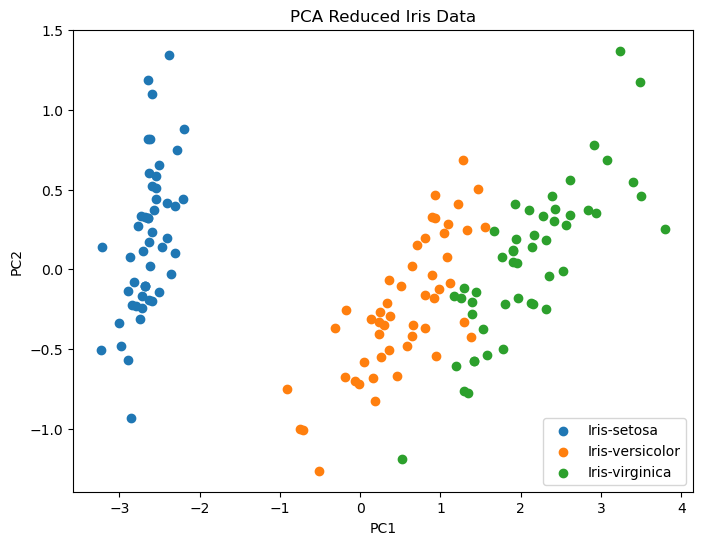

In [50]:
iris_2d = pd.DataFrame(projected_data)
iris_2d.columns = ['x', 'y']
iris_2d['y'] = -iris_2d['y']
iris_2d['species'] = data['Species']

# create a scatter plot
plt.figure(figsize=(8, 6))
plt.title("PCA Reduced Iris Data")

# scatter plot with different colors for each species
for species in iris_2d['species'].unique():
    species_data = iris_2d[iris_2d['species'] == species]
    plt.scatter(species_data['x'], species_data['y'], label=species)

# add labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

plt.show()

##### *The final graph represents a 2-dimensional visualization of the Iris dataset after applying Principal Component Analysis (PCA) to reduce its original 4 dimensions (sepal length, sepal width, petal length, and petal width) to just 2 dimensions. This reduction captures the majority of the variance in the data while simplifying its structure for easier interpretation.*

#### Calculate the reconstrucion error
The reconstruction error quantifies how much information was **lost** in the dimensionality reduction process. It is calculated using **mean squared error** between the original centered data and the reconstructed data

> $Reconstruction Error= \displaystyle{1\over{N}}\displaystyle\sum_{i=1}^{N}∥X n−\overline{X} n∥$

Where:
- $X n$: Original centered data point row $n$ 
- $\overline{X} n$: Reconstructed data point row $n$
- $N$: The total number of rows
- $∥ · ∥^2$: The squared Euclidean norm of the vector (sum of squared differences for each row).

Why compute the reconstruction error?
- A **small reconstruction error** means the reduced representation captures **most of the variance** in the data
- Vary the number of components (num_components) and observe how the error changes. Fewer components generally result in higher reconstruction errors.

In [51]:
# reconstruct the data
reconstructed_data = projected_data * principal_components.transpose()

# calculate the reconstruction error (MSE)
error_matrix = centered_data - reconstructed_data
mse_reconstruction_error = (1 / centered_data.nrows()) * sum(row.norm()**2 for row in error_matrix.rows())
percentage_loss_data = round(mse_reconstruction_error * 100,2)
print(f"{percentage_loss_data}%")


10.15%


*In PCA, the **variance retained** by each principal component indicates how much of the original data's **spread is captured**. However, reconstruction error is influenced not only by the variance explained, but also by how well the components **represent** the data’s structure. Even when a large portion of the variance is captured, reconstruction error can remain high if important data structure is missed. This **trade-off** between variance retention and information loss is reflected in the varying reconstruction errors as more components are used.*


##### Case 1: 1 Principal Components
> Loss: 34.22%

Explanation:  By using one principal component, 65.78% of the total variance is preserved. This implies that 34.22% of the data's overall variance remains unaccounted for, resulting in a loss of information. Although 92% of the total variance is retained along the first component, the reconstruction error is still notable because non-linear or finer details in the data are not captured by this single component.
##### Case 2: 2 Principal Components
> Loss: 10.15%

Explanation: Using 2 principal components, the retained variance is 89.85%. This means that 10.15% of the total variance in the data is not captured by the top 2 components, leading to this loss of information.

##### Case 3: 3 Principal Components
> Loss: 2.35%

Explanation: With 3 principal components, the retained variance increases to 97.65%. The loss of variance is reduced to 2.35%, as an additional component contributes to capturing more of the total variance. The reconstruction error decreases as more components are added, indicating that the remaining structure in the data is being better represented.



##### Case 4: 4 Principal Components
> Loss: 0.0%

Explanation: Using 4 principal components, 100.00% of the total variance is retained. This eliminates any loss of variance, as the additional components fully capture the remaining variability in the data.

### Conclusion

Applying **Principal Component Analysis (PCA)** to the *Iris dataset* demonstrates a clear **trade-off** between the number of principal components and the reconstruction error, measured by the **mean squared error (MSE)**. As the number of principal components increases, the retained variance approaches 100%, and the **loss of variance** decreases significantly. 

- With only **one** principal component, a substantial **loss** of **34.22%** occurs, highlighting limited data representation.  
- Adding a **second** component reduces the **loss** to **10.15%**, showing a significant improvement in reconstruction accuracy.  
- By including a **third** components, the loss **drops** further to **2.35%**, capturing nearly all the variance.  
- Finally, using **all** principal components **eliminates any loss** of variance, achieving perfect reconstruction of the original data.

This analysis underscores the importance of selecting an appropriate number of components based on the balance between minimizing information loss and achieving **dimensionality reduction**. For the Iris dataset, 2 principal components provide a sufficient description of the data, retaining most of the variance while significantly reducing dimensionality.